# Smoothness analysis

In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import umap

In [3]:
# Import data
adata = sc.read_h5ad("/Users/olyssa/PycharmProjects/VAE_embeddings/PBMC_adata.h5ad")

In [4]:
# Define embedding space
embedding_data = adata.obsm["embedding"]

# Define original space
original_data = adata.layers["counts"].toarray()

In [5]:
# Reduce data
sample_size = 10**4
#cell_indices = [random.randint(0, original_data.shape[0]-1) for c in range(0, sample_size)]

cell_indices = pd.read_csv("/Users/olyssa/PycharmProjects/VAE_embeddings/2_Embedding_space_properties_investigation/2a_Stability_Analysis/cell_indices.csv")
cell_indices = list(cell_indices["cell_indices"])

embedding_data_red = embedding_data[cell_indices]

atac = adata.obsm["ATAC"].toarray()[cell_indices]
original_data_red = original_data[cell_indices]
original_data_red_atac = np.concatenate((original_data_red, atac), axis=1)

In [101]:
#pd.DataFrame(cell_indices, columns=["cell_indices"]).to_csv("cell_indices.csv", index=False)

## Lipschitz continuity: local and global stability

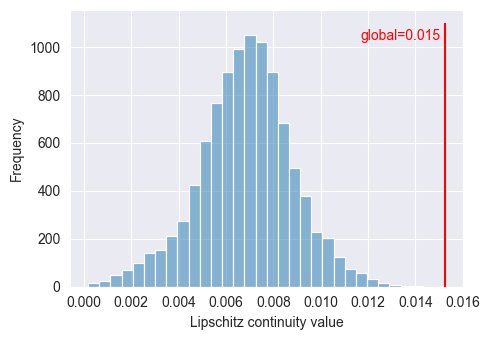

Local Lipschitz distribution: 0.007 ± 0.002


In [6]:
# Visualization
lipschitz_constants = pd.read_csv("lipschitz_constants_local_reduced.csv")
L_global = pd.read_csv("lipschitz_constant_global_reduced.csv").values[0][0]

fig, axes = plt.subplots(figsize=(5, 3.5))
bars = sns.histplot(lipschitz_constants, bins=30, kde=False, legend=False)
plt.vlines(x=L_global, ymin=0, ymax=1100, color="red")
plt.text(x=L_global-0.0036, y=1030, s=f"global={L_global.round(3)}", c="red")
plt.xlabel("Lipschitz continuity value")
plt.ylabel("Frequency")
fig.tight_layout()
fig.savefig('lipschitz_continuity_reduced.png', dpi=200)
plt.show()
print("Local Lipschitz distribution:", lipschitz_constants["0"].mean().round(3), "±", np.std(lipschitz_constants["0"].tolist()).round(3))

/Users/olyssa/opt/anaconda3/envs/vae/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


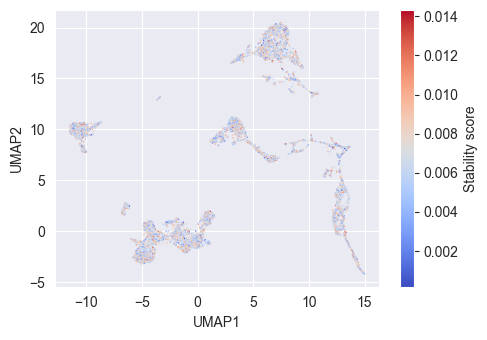

In [7]:
# Plot UMAP with stability values
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_2d_stability = umap_model.fit_transform(embedding_data_red)

fig, ax = plt.subplots(figsize=(5, 3.5))
sc = ax.scatter(embeddings_2d_stability[:, 0], embeddings_2d_stability[:, 1], c=[lipschitz_constants], cmap="coolwarm", s=1, linewidth=0)
cbar = plt.colorbar(sc, ax=ax)
cbar.set_label("Stability score")
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
fig.tight_layout()
fig.savefig('local_stability_UMAP.png', dpi=200)
plt.show()

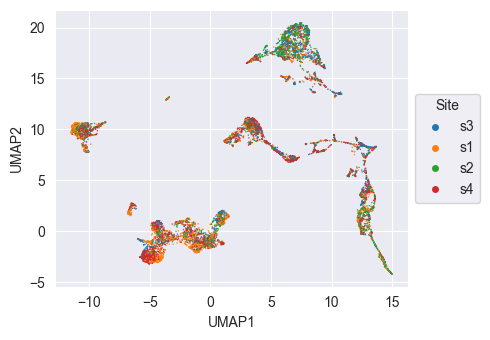

In [8]:
# Plot UMAP colored by "site"

categories_batch = adata.obs["site"].iloc[cell_indices].tolist()

fig, ax = plt.subplots(figsize=(5, 3.5))
sns.scatterplot(x=embeddings_2d_stability[:, 0], y=embeddings_2d_stability[:, 1], hue=categories_batch, palette="tab10", s=1, linewidth=0)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=5, title="Site", ncol=1)
fig.tight_layout()
fig.savefig('UMAP_site_red.png', dpi=200)
plt.show()

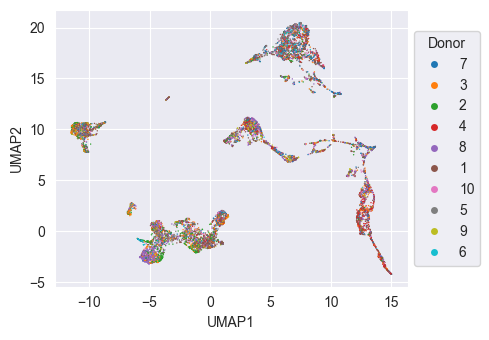

In [9]:
# Plot UMAP colored by "donor"

categories_batch = adata.obs["donor"].iloc[cell_indices].tolist()

fig, ax = plt.subplots(figsize=(5, 3.5))
sns.scatterplot(x=embeddings_2d_stability[:, 0], y=embeddings_2d_stability[:, 1], hue=categories_batch, palette="tab10", s=1, linewidth=0)
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), markerscale=5, title="Donor", ncol=1)
fig.tight_layout()
fig.savefig('UMAP_donor_red.png', dpi=200)
plt.show()